In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

df = pd.read_csv(r"C:\Users\Simrat Khalsa\Downloads\FEV-data-Excel.xlsx - Auta elektryczne.csv")

df.head()

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,340,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,364,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,346,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,447,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [6]:
#Task 1:  A customer has a budget of 350,000 PLN and wants an EV with a minimum range
# of 400 km.
# a) Your task is to filter out EVs that meet these criteria.(2 Marks)
budget = 350000
min_range = 400

filtered_evs = df[(df['Minimal price (gross) [PLN]'] <= budget) & 
                  (df['Range (WLTP) [km]'] >= min_range)]

print(filtered_evs)


                        Car full name           Make  \
0              Audi e-tron 55 quattro           Audi   
8                             BMW iX3            BMW   
15        Hyundai Kona electric 64kWh        Hyundai   
18                   Kia e-Niro 64kWh            Kia   
20                   Kia e-Soul 64kWh            Kia   
22                  Mercedes-Benz EQC  Mercedes-Benz   
39  Tesla Model 3 Standard Range Plus          Tesla   
40           Tesla Model 3 Long Range          Tesla   
41          Tesla Model 3 Performance          Tesla   
47    Volkswagen ID.3 Pro Performance     Volkswagen   
48              Volkswagen ID.3 Pro S     Volkswagen   
49                Volkswagen ID.4 1st     Volkswagen   

                          Model  Minimal price (gross) [PLN]  \
0             e-tron 55 quattro                       345700   
8                           iX3                       282900   
15          Kona electric 64kWh                       178400   
18             

In [7]:
# b) Group them by the manufacturer (Make).(6 marks)
grouped_by_make = filtered_evs.groupby('Make').size().reset_index(name='Count')
print(grouped_by_make)

            Make  Count
0           Audi      1
1            BMW      1
2        Hyundai      1
3            Kia      2
4  Mercedes-Benz      1
5          Tesla      3
6     Volkswagen      3


In [8]:

# c) Calculate the average battery capacity for each manufacturer. (8 Marks)
average_battery_capacity = filtered_evs.groupby('Make')['Battery capacity [kWh]'].mean().reset_index()
average_battery_capacity.columns = ['Make', 'Average Battery Capacity (kWh)']
print(average_battery_capacity)

            Make  Average Battery Capacity (kWh)
0           Audi                       95.000000
1            BMW                       80.000000
2        Hyundai                       64.000000
3            Kia                       64.000000
4  Mercedes-Benz                       80.000000
5          Tesla                       68.000000
6     Volkswagen                       70.666667


In [10]:
#Task 2: You suspect some EVs have unusually high or low energy consumption. Find the
#outliers in the mean- Energy consumption [kWh/100 km] column.(16 Marks)
print(df.columns)


Index(['Car full name', 'Make', 'Model', 'Minimal price (gross) [PLN]',
       'Engine power [KM]', 'Maximum torque [Nm]', 'Type of brakes',
       'Drive type', 'Battery capacity [kWh]', 'Range (WLTP) [km]',
       'Wheelbase [cm]', 'Length [cm]', 'Width [cm]', 'Height [cm]',
       'Minimal empty weight [kg]', 'Permissable gross weight [kg]',
       'Maximum load capacity [kg]', 'Number of seats', 'Number of doors',
       'Tire size [in]', 'Maximum speed [kph]', 'Boot capacity (VDA) [l]',
       'Acceleration 0-100 kph [s]', 'Maximum DC charging power [kW]',
       'mean - Energy consumption [kWh/100 km]', 'Z-Score'],
      dtype='object')


In [11]:
mean_consumption = df['mean - Energy consumption [kWh/100 km]'].mean()
std_consumption = df['mean - Energy consumption [kWh/100 km]'].std()


df['Z-Score'] = (df['mean - Energy consumption [kWh/100 km]'] - mean_consumption) / std_consumption
outliers = df[(df['Z-Score'] > 3) | (df['Z-Score'] < -3)]

print(outliers[['Car full name', 'mean - Energy consumption [kWh/100 km]', 'Z-Score']])



Empty DataFrame
Columns: [Car full name, mean - Energy consumption [kWh/100 km], Z-Score]
Index: []


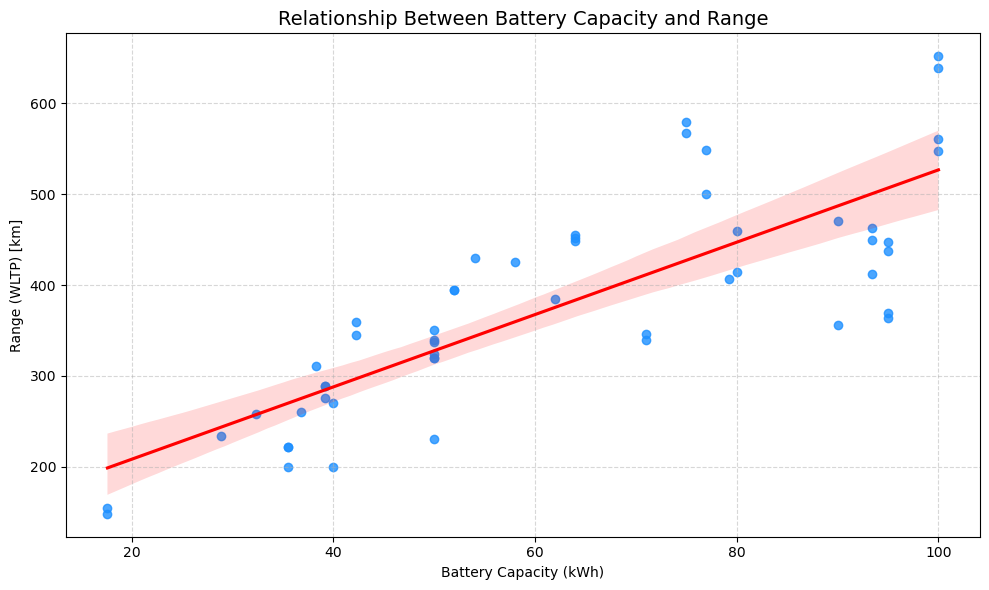

In [16]:
# Task 3: Your manager wants to know if there's a strong relationship between battery
# capacity and range.
# a) Create a suitable plot to visualize.(8 Marks)
df['Battery capacity [kWh]'] = pd.to_numeric(df['Battery capacity [kWh]'], errors='coerce')
df['Range (WLTP) [km]'] = pd.to_numeric(df['Range (WLTP) [km]'], errors='coerce')

# Drop rows with missing values in either column
ev_data = df[['Battery capacity [kWh]', 'Range (WLTP) [km]']].dropna()

# Plotting
plt.figure(figsize=(10, 6))
sns.regplot(
    data=ev_data,
    x='Battery capacity [kWh]',
    y='Range (WLTP) [km]',
    scatter_kws={'color': 'dodgerblue'},
    line_kws={'color': 'red'}
)
plt.title('Relationship Between Battery Capacity and Range', fontsize=14)
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (WLTP) [km]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [12]:
#Task 4: Build an EV recommendation class. The class should allow users to input their
# budget, desired range, and battery capacity. The class should then return the top three EVs
# matching their criteria. (8+8 Marks)
class EVRecommendation:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def recommend(self, budget, min_range, min_battery_capacity):
        recommendations = self.dataframe[
            (self.dataframe['Minimal price (gross) [PLN]'] <= budget) &
            (self.dataframe['Range (WLTP) [km]'] >= min_range) &
            (self.dataframe['Battery capacity [kWh]'] >= min_battery_capacity)
        ]
        return recommendations.nlargest(3, 'Battery capacity [kWh]')


ev_recommender = EVRecommendation(df)
top_evs = ev_recommender.recommend(350000, 400, 50)  
print(top_evs[['Car full name', 'Make', 'Battery capacity [kWh]']])

             Car full name           Make  Battery capacity [kWh]
0   Audi e-tron 55 quattro           Audi                    95.0
8                  BMW iX3            BMW                    80.0
22       Mercedes-Benz EQC  Mercedes-Benz                    80.0


In [13]:
# Task 5: Inferential Statistics– Hypothesis Testing: Test whether there is a significant
# difference in the average Engine power [KM] of vehicles manufactured by two leading
# manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
df = pd.read_csv(r"C:\Users\Simrat Khalsa\Downloads\FEV-data-Excel.xlsx - Auta elektryczne.csv")
tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]']


print(f"Average Engine Power for Tesla: {tesla_power.mean()} KM")
print(f"Average Engine Power for Audi: {audi_power.mean()} KM")

Average Engine Power for Tesla: 533.0 KM
Average Engine Power for Audi: 392.0 KM


In [14]:
#Conducting t-test
t_stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)  # Welch's t-test

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 1.7939951827297178
P-value: 0.10684105068839565


In [15]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average engine power.")
else:
    print("Fail to reject the null hypothesis: No significant difference in average engine power.")

Fail to reject the null hypothesis: No significant difference in average engine power.


Video link: https://youtu.be/WdG2UPY6l0Q